# Credit Risk Prediction using ML Algorithms

Importing all neccesary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Loading the dataset

In [ ]:
df = pd.read_csv('loan_approval.csv')

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Data Analysis and Preprocessing

Number of Rows and colums

In [ ]:
df.shape

(45000, 14)

Checking for Null values in any columns <br>
There are no missing values in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

📊 **Distribution of Unique Values Across Categorical Features**

This visualization shows the frequency of unique values for categorical/discrete features in the dataset. Each bar represents the count of occurrences for a specific category, providing insights into data distribution.






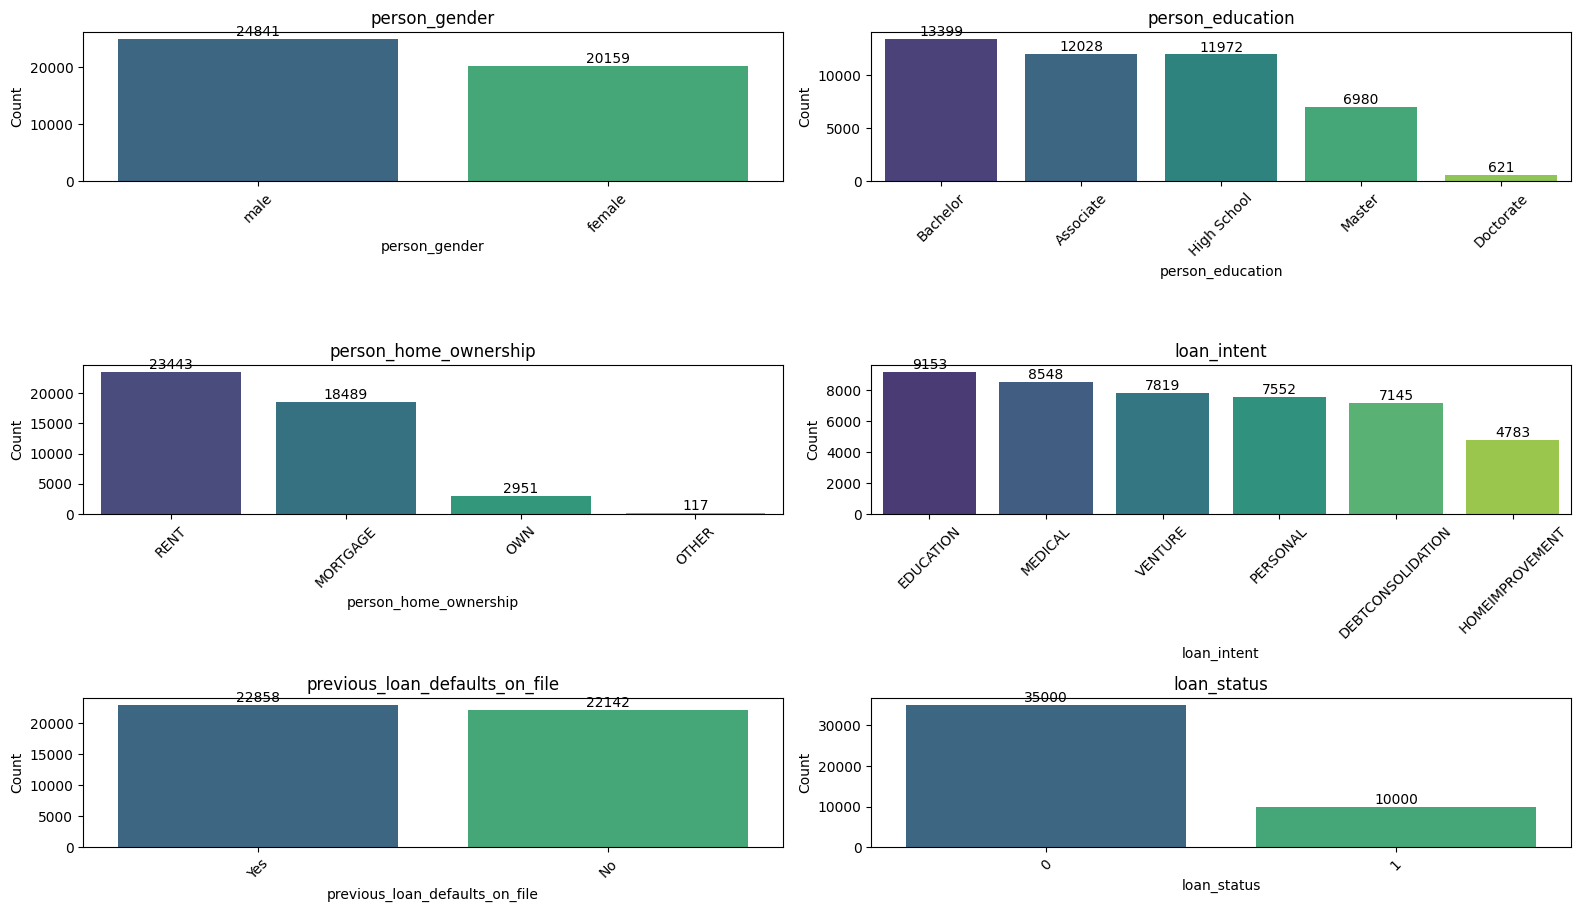

In [ ]:
categorical_cols = [
    "person_gender", "person_education", "person_home_ownership",
    "loan_intent", "previous_loan_defaults_on_file", "loan_status"
]

fig, axes = plt.subplots(nrows=len(categorical_cols)//2 + 1, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, ax=axes[i], palette="viridis", legend=False)

    for p in axes[i].containers:
        axes[i].bar_label(p, fmt='%d', label_type='edge', fontsize=10)

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Checking for duplicate records

In [ ]:
df.duplicated().sum()

0

In [ ]:
numerical_cols = [
    "person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate",
    "loan_percent_income","cb_person_cred_hist_length","credit_score"
]

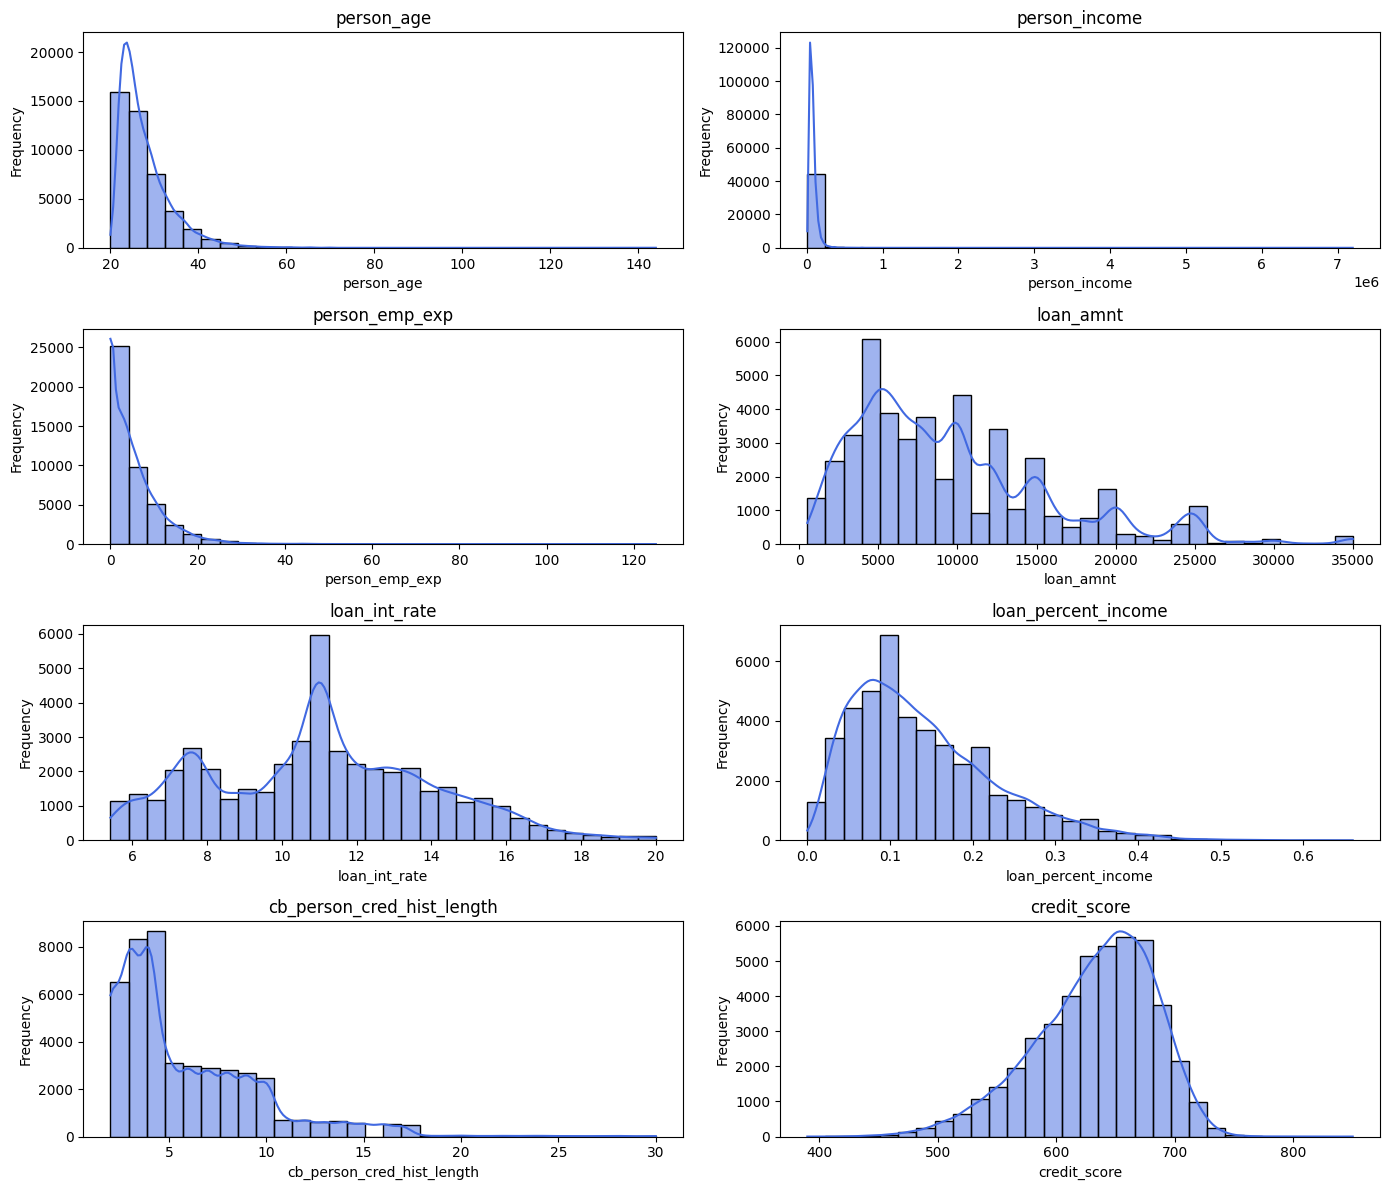

In [ ]:
# Set figure size for multiple plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot histogram for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

**From the above graph, we can infer lot of information**<br>


*   person age and person emplyoment experiance are in years but few <br> examples have value greater than 100 and even 120, this is noisy data
*   List item



In [ ]:
count_age_above_100 = df[df["person_age"] > 100].shape[0]
print(f"Number of people with age > 100: {count_age_above_100}")

count_emp_exp_above_50 = df[df["person_emp_exp"] > 50].shape[0]
print(f"Number of people with experiance > 50: {count_emp_exp_above_50}")

Number of people with age > 100: 7
Number of people with experiance > 50: 12


In [ ]:
incorrect_data = df[df["person_age"] < df["person_emp_exp"] ].shape[0]
print(f"Number of people with age less than experiance : {incorrect_data}")

Number of people with age less than experiance : 0


In [ ]:
# Droping the above Noisy data
df = df[(df["person_age"] <= 100) & (df["person_emp_exp"] <= 50)]

**Box Plot for Outliers**

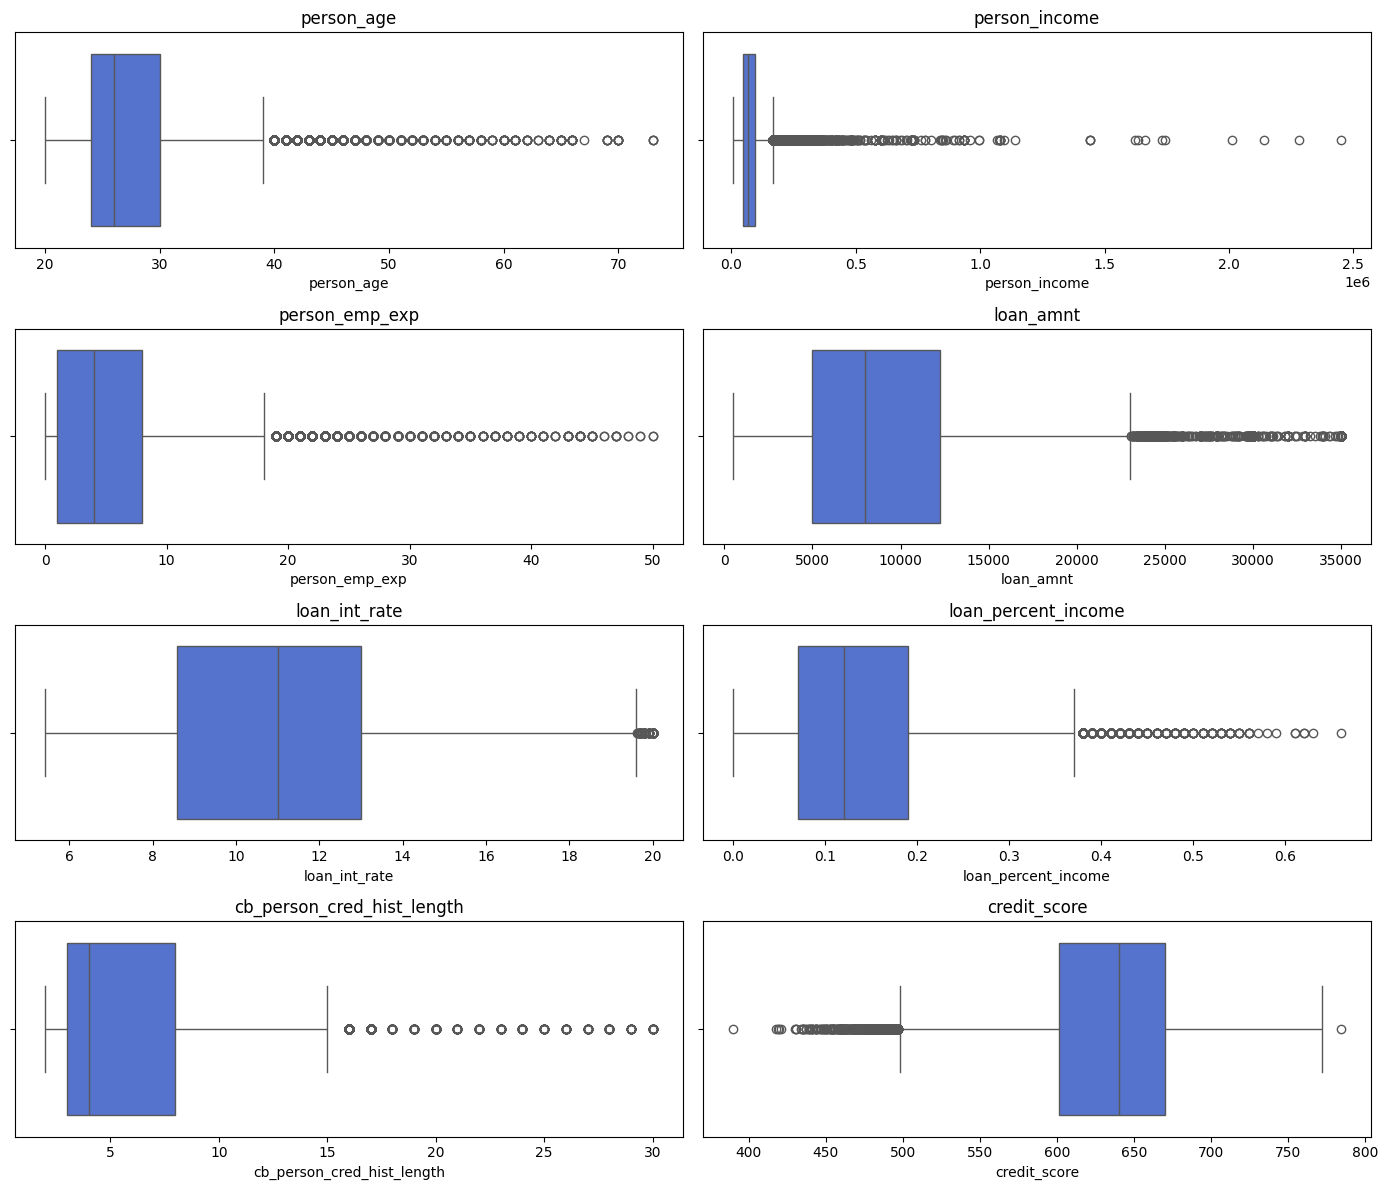

In [ ]:
# Set figure size for multiple plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten for easy iteration

# Create a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="royalblue")
    axes[i].set_title(f"{col}")

# Adjust layout
plt.tight_layout()
plt.show()

Number of Outliers for each column

In [ ]:
def count_outliers(df, numerical_cols):
    outlier_counts = {}

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_counts[col] = outliers

    return outlier_counts

outlier_counts = count_outliers(df, numerical_cols)

outlier_df = pd.DataFrame(outlier_counts.items(), columns=["Column", "Outlier Count"])
outlier_df.head(8)

,Column,Outlier Count
0,person_age,2176
1,person_income,2213
2,person_emp_exp,1712
3,loan_amnt,2348
4,loan_int_rate,124
5,loan_percent_income,744
6,cb_person_cred_hist_length,1358
7,credit_score,461


**Handling Outliers in Data Analysis**<br>
Outliers are extreme values that can distort analysis and model performance. They can be handled in several ways:<br>


1.   Remove Outliers – If they are clearly incorrect (e.g., negative age).
2.   Cap Values (Winsorization) – Set an upper/lower limit to keep extreme values realistic.
3.   Use Robust Statistics – Prefer median & IQR over mean & standard deviation.
4.   Keep Outliers (If Meaningful) – Analyze separately if they represent rare but valid cases.


**Ouliers Analysis for each column**

1. Person age : We have already removed persons above 100 years. From box plot we can see that max age is around 75. Therefore is it ok to keep these outliers
2. Person Income : The max income was found to be 2.45 million which is practical so no issue with the outliers.
3. Person Emplyoment experience :
4. Loan amount : No issue
5. Loan interest rate : No issue
6. Loan % income : Normally, banks don't allow loans exceeding 40-50% of income. so, we will do capping at 50
7. Credit history length : We will do capping at upper bound
8. Credit score : In general the credit scores are in the range 300-800. From box plot we can see all the values are within this range so, we are not removing these outliers.






In [ ]:
df.loc[:, "loan_percent_income"] = df["loan_percent_income"].clip(upper=0.5)

In [ ]:
Q1 = df["cb_person_cred_hist_length"].quantile(0.25)
Q3 = df["cb_person_cred_hist_length"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR  # Outlier threshold

# Cap values above upper bound using .loc
df.loc[:, "cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].clip(upper=upper_bound)

**Correlation Heatmap**

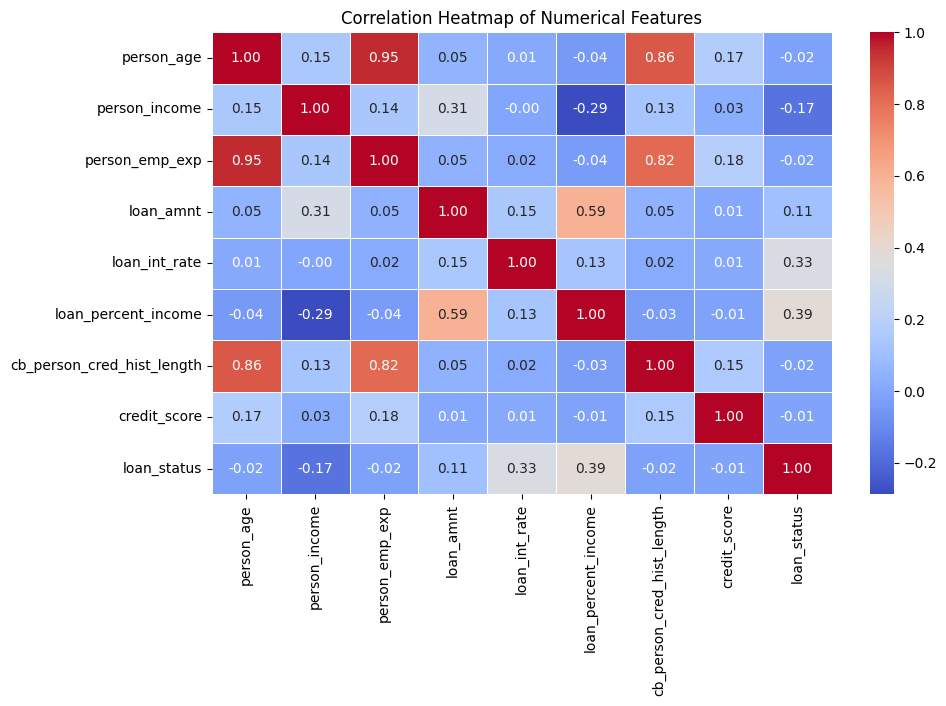

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Feature Extraction

To improve our loan default prediction, we engineered three new features based on existing data:

1️⃣ Employment Experience Ratio (Emp_Exp_Ratio)

Formula: person_emp_exp / person_age
: This signifies career stability and measures whether work experience is reasonable for a given age.

2️⃣ Loan-to-Credit Ratio (Loan_to_Credit)

Formula: loan_amnt / credit_score
: Evaluates whether a loan amount is too high compared to creditworthiness.

3️⃣ Loan Affordability Score (Loan_Affordability)

Formula: loan_percent_income / credit_score
: Measures how much of a borrower's income is burdened by the loan, adjusted for credit score.


In [ ]:
# Create new features

df["Emp_Exp_Ratio"] = df["person_emp_exp"] / df["person_age"]
df["Loan_to_Credit"] = df["loan_amnt"] / df["credit_score"]
df["Loan_Affordability"] = df["loan_percent_income"] / df["credit_score"]

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,Emp_Exp_Ratio,Loan_to_Credit,Loan_Affordability
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0.000000,62.388592,0.000873
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.000000,1.984127,0.000159
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.120000,8.661417,0.000693
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0.000000,51.851852,0.000652
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.50,4.0,586,No,1,0.041667,59.726962,0.000853


In [ ]:
from scipy.stats import f_oneway

# List of extracted features
extracted_features = ["Emp_Exp_Ratio", "Loan_to_Credit", "Loan_Affordability"]

# Perform ANOVA for each feature
anova_results = {}
for feature in extracted_features:
    group_0 = df[df["loan_status"] == 0][feature]  # Non-defaulters
    group_1 = df[df["loan_status"] == 1][feature]  # Defaulters

    # Perform ANOVA test
    f_stat, p_value = f_oneway(group_0, group_1)

    anova_results[feature] = {"F-statistic": f_stat, "p-value": p_value}

# Convert results to DataFrame for better visualization
import pandas as pd
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")

anova_df.head()

,F-statistic,p-value
Emp_Exp_Ratio,25.830104,3.743182e-07
Loan_to_Credit,515.651492,1.629205e-113
Loan_Affordability,7604.030618,0.000000e+00


Since p values are less than 0.05, these features are very significant

Performing Label Encoding for the categorical(text datatype) columns

In [ ]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
for col in categorical_cols:
    print(f"Mapping for {col}:")
    for original, encoded in zip(label_encoders[col].classes_, range(len(label_encoders[col].classes_))):
        print(f"{original} -> {encoded}")
    print()

Mapping for person_gender:
female -> 0
male -> 1

Mapping for person_education:
Associate -> 0
Bachelor -> 1
Doctorate -> 2
High School -> 3
Master -> 4

Mapping for person_home_ownership:
MORTGAGE -> 0
OTHER -> 1
OWN -> 2
RENT -> 3

Mapping for loan_intent:
DEBTCONSOLIDATION -> 0
EDUCATION -> 1
HOMEIMPROVEMENT -> 2
MEDICAL -> 3
PERSONAL -> 4
VENTURE -> 5

Mapping for previous_loan_defaults_on_file:
No -> 0
Yes -> 1



In [ ]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

info_gain = mutual_info_classif(X, y)

In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
feature_importance = feature_importance.sort_values(by='Information Gain', ascending=False)

# Print the Information Gain scores
print(feature_importance)

                           Feature  Information Gain
12  previous_loan_defaults_on_file          0.200739
3                    person_income          0.090842
9              loan_percent_income          0.081210
15              Loan_Affordability          0.078667
8                    loan_int_rate          0.070004
5            person_home_ownership          0.037384
6                        loan_amnt          0.019661
7                      loan_intent          0.010139
14                  Loan_to_Credit          0.008190
1                    person_gender          0.005178
2                 person_education          0.003125
0                       person_age          0.002273
10      cb_person_cred_hist_length          0.001821
4                   person_emp_exp          0.001706
11                    credit_score          0.000000
13                   Emp_Exp_Ratio          0.000000


In [ ]:
X = X.drop(columns=['credit_score', 'person_emp_exp','Emp_Exp_Ratio']) # These features are negligible

In [ ]:
#Step 3
# Normalisation

numerical_cols = [ "person_age", "person_income", "loan_amnt", "loan_int_rate", "loan_percent_income"]

scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Model Training and Prediction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 4
# Applying different ML Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=200, verbose=0, random_state=42)
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy, "Recall": recall})

# Convert results to DataFrame and sort by Accuracy
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

print("\nModel Performance:\n", df_results)


Model Performance:
                  Model  Accuracy    Recall
5             CatBoost  0.937431  0.796398
3              XGBoost  0.934319  0.809405
4        Random Forest  0.932207  0.778389
2             AdaBoost  0.909758  0.781391
1        Decision Tree  0.901645  0.787894
0  Logistic Regression  0.894421  0.748374


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1200x600 with 0 Axes>

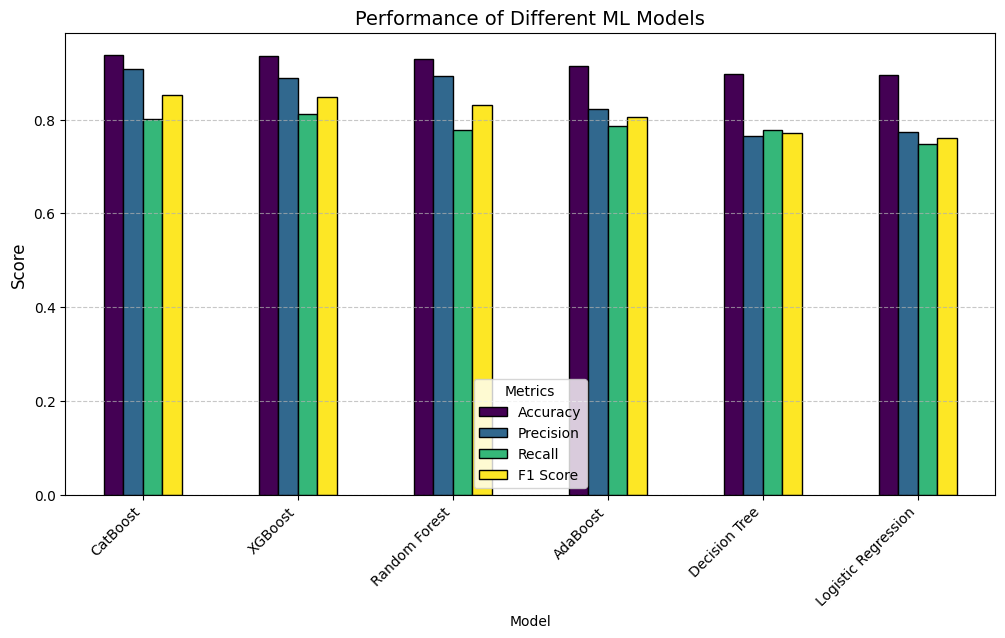

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=200, verbose=0, random_state=42)
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # Avoid division errors
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
df_results.set_index("Model").plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Formatting
plt.title("Performance of Different ML Models", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

#Training Model after applying SMOTE

In [ ]:
# Apply SMOTE only on the training set

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Print class distribution before and after SMOTE
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_smote.value_counts())

Before SMOTE:
 loan_status
0    27989
1     8001
Name: count, dtype: int64
After SMOTE:
 loan_status
1    27989
0    27989
Name: count, dtype: int64


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, verbose=0, random_state=42)
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": accuracy, "Recall": recall})

In [ ]:
df_results = pd.DataFrame(results).sort_values(by=["Recall", "Accuracy"], ascending=[False, False])

df_results.head(6)

,Model,Accuracy,Recall
0,Logistic Regression,0.857524,0.914457
3,AdaBoost,0.877862,0.913457
2,Random Forest,0.910313,0.883942
4,XGBoost,0.927984,0.851926
5,CatBoost,0.922538,0.846923
1,Decision Tree,0.884641,0.816408


In [ ]:
X_train_smote.describe()

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,Loan_to_Credit,Loan_Affordability
count,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000,55978.000000
mean,0.143554,0.511344,1.702758,0.026623,1.915896,0.278182,2.382900,0.428107,0.324872,5.724382,0.326092,16.052992,0.000259
std,0.108792,0.499876,1.468799,0.023272,1.403397,0.192779,1.703954,0.203964,0.191565,3.548820,0.468786,10.679482,0.000155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.758725,0.000000
25%,0.068362,0.000000,0.000000,0.014279,0.000000,0.130435,1.000000,0.297668,0.171670,3.000000,0.000000,7.862756,0.000135
50%,0.113208,1.000000,1.000000,0.021774,3.000000,0.233333,3.000000,0.416324,0.283005,4.000000,0.000000,13.725713,0.000228
75%,0.188679,1.000000,3.000000,0.032526,3.000000,0.391304,4.000000,0.576179,0.460000,8.000000,1.000000,21.919679,0.000364
max,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,15.500000,1.000000,74.468085,0.001012


# Extracting the Pickle

In [2]:
import pickle

In [ ]:
# Train XGBoost model
model = XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42)
model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [4]:
# Define a custom class that handles preprocessing and prediction
class LoanApprovalModel:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler

    def preprocess_input(self, input_data):

        # Compute new features
        input_data["Loan_to_Credit"] = input_data["loan_amnt"] / input_data["credit_score"]
        input_data["Loan_Affordability"] = input_data["loan_percent_income"] / input_data["credit_score"]
        input_data.pop("credit_score", None)

        # Convert to DataFrame
        input_df = pd.DataFrame([input_data])

        # Apply Min-Max Scaling
        numerical_cols = ["person_age", "person_income", "loan_amnt", "loan_int_rate", "loan_percent_income"]
        input_df[numerical_cols] = self.scaler.transform(input_df[numerical_cols])

        return input_df

    def predict(self, input_data):

        processed_input = self.preprocess_input(input_data)
        prediction = self.model.predict(processed_input)
        return "Rejected" if prediction[0] == 1 else "Approved"

In [ ]:
# Create the complete pipeline object
loan_pipeline = LoanApprovalModel(model, scaler)

# Save the pipeline as a pickle file
with open("loan_xgboost.pkl", "wb") as f:
    pickle.dump(loan_pipeline, f)

print("✅ Model pipeline saved as loan_xgboost.pkl")

✅ Model pipeline saved as loan_xgboost.pkl


In [19]:
# Load the saved model pipeline
with open("loan_xgboost.pkl", "rb") as f:
    loan_pipeline = pickle.load(f)

# Sample input
input_data = {
    "person_age": 30,
    "person_gender": 1, # female:0, male:1
    "person_education": 2, # Associate:0, Bachelor:1, Doctorate:2, High School:3, Master:4
    "person_income": 50,
    "person_home_ownership": 1, # MORTGAGE:0, OTHER:1, OWN:2, RENT:3
    "loan_amnt": 1000,
    "loan_intent": 3, # DEBTCONSOLIDATION:0, EDUCATION:1, HOMEIMPROVEMENT:2, MEDICAL:3, PERSONAL:4, VENTURE:5
    "loan_int_rate": 12.5,
    "loan_percent_income": 0.3,
    "cb_person_cred_hist_length": 5,
    "previous_loan_defaults_on_file": 1, # No:0, yes:1
    "credit_score" : 450
}

# Predict
prediction = loan_pipeline.predict(input_data)
print("🔹 Loan Approval Prediction:", prediction)

🔹 Loan Approval Prediction: Approved
